In [52]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from xgboost import plot_importance


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

RSEED = 42


In [2]:
pip freeze

aiohttp==3.8.3
aiosignal==1.3.1
altair==4.1.0
anyio==3.6.2
appnope==0.1.3
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
asttokens==2.1.0
async-timeout==4.0.2
attrs==22.1.0
Babel==2.11.0
backcall==0.2.0
beautifulsoup4==4.11.1
bleach==5.0.1
certifi==2022.9.24
cffi==1.15.1
charset-normalizer==2.1.1
click==8.1.3
cycler==0.11.0
dash==2.7.0
dash-core-components==2.0.0
dash-html-components==2.0.0
dash-table==5.0.0
debugpy==1.6.3
decorator==5.1.1
defusedxml==0.7.1
entrypoints==0.4
executing==1.2.0
fastjsonschema==2.16.2
Flask==2.2.2
fonttools==4.38.0
frozenlist==1.3.3
idna==3.4
importlib-metadata==5.0.0
iniconfig==1.1.1
ipykernel==6.17.1
ipython==8.6.0
ipython-genutils==0.2.0
ipywidgets==7.6.5
itsdangerous==2.1.2
jedi==0.18.2
Jinja2==3.1.2
joblib==1.2.0
json5==0.9.10
jsonschema==4.17.1
jupyter-server==1.23.3
jupyter-server-proxy==3.2.2
jupyter_client==7.4.7
jupyter_core==5.0.0
jupyterlab==3.2.5
jupyterlab-dash==0.1.0a3
jupyterlab-pygments==0.2.2
jupyterlab-widgets==3.0.3
jupyterlab_server==

In [3]:

import glob
import os

path = r'data/' # use your path
all_files = glob.glob(os.path.join(path , "*.csv"))

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
df = pd.concat(li, axis=0, ignore_index=True)


## EDA

## Description of the clomns

# Columns 
'backers_count', 
'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type'],
      dtype='object')

In [4]:
df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type'],
      dtype='object')

In [5]:
df.head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,315,Babalus Shoes,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",28645,US,1541459205,"{""id"":2094277840,""name"":""Lucy Conroy"",""slug"":""...",USD,$,True,...,babalus-childrens-shoes,https://www.kickstarter.com/discover/categorie...,False,False,live,1548223375,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",28645.000000,international
1,47,A colorful Dia de los Muertos themed oracle de...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",1950,US,1501684093,"{""id"":723886115,""name"":""Lisa Vollrath"",""slug"":...",USD,$,True,...,the-ofrenda-oracle-deck,https://www.kickstarter.com/discover/categorie...,True,False,successful,1504976459,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1950.000000,domestic
2,271,"Electra's long awaited, eclectic Debut Pop/Roc...","{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",22404,US,1348987533,"{""id"":323849677,""name"":""Electra"",""is_registere...",USD,$,True,...,record-electras-debut-album-pop-rock-classical,https://www.kickstarter.com/discover/categorie...,True,False,successful,1371013395,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",22404.000000,international
3,3,The Mist of Tribunal is a turn-based card game...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",165,GB,1483780271,"{""id"":196281496,""name"":""Artur Ordijanc (delete...",GBP,£,False,...,the-mist-of-tribunal-a-card-game,https://www.kickstarter.com/discover/categorie...,False,False,failed,1489425776,1.216066,"{""web"":{""project"":""https://www.kickstarter.com...",165.384934,domestic
4,3,"Livng with a brain impairment, what its like t...","{""id"":48,""name"":""Nonfiction"",""slug"":""publishin...",2820,US,1354817071,"{""id"":1178460181,""name"":""Dawn Johnston"",""is_re...",USD,$,True,...,help-change-the-face-of-brain-impairment,https://www.kickstarter.com/discover/categorie...,True,False,successful,1357763527,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2820.000000,domestic


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             209222 non-null  int64  
 1   blurb                     209214 non-null  object 
 2   category                  209222 non-null  object 
 3   converted_pledged_amount  209222 non-null  int64  
 4   country                   209222 non-null  object 
 5   created_at                209222 non-null  int64  
 6   creator                   209222 non-null  object 
 7   currency                  209222 non-null  object 
 8   currency_symbol           209222 non-null  object 
 9   currency_trailing_code    209222 non-null  bool   
 10  current_currency          209222 non-null  object 
 11  deadline                  209222 non-null  int64  
 12  disable_communication     209222 non-null  bool   
 13  friends                   300 non-null     o


# candidates columns to be deleted:
> *blurb* : only non qualitativ descriptive information about the project 

> *category*: we keep it for future model processing. The values of this column are dictionary packed as string. It dosen't provide us directly with a quantitative value. Later may be we extract some usefull numerical information from it. 

> *creators* : same reasons as for categories  

> *currency_symbol*

> *currency_trailing_code*

> *slug*

> *source_url*

> *spotlight*

> *state_usd_rate*

> *urls*

> *friends* : it contains just NaN and "[ ]".

> *fx_rate* 

> *id*

> *is_starred*

> *is_backing*

> *location*

> *permissions*

> *photo*

> *pledged*

> *name*

> *profile*

# candidates for dummies
> *country*

> *currency*
# candidate for type-transformation

> *created_at* we want to have a DateTime type!

> *statechange_at* we want to have a DateTime datatype!

> *launched_at*

# *Target* : state

As we see in the foolowing code the currency, currency_symbol and currency_trailing_code are completly correlated. So we can delete two of them.

In [7]:
# in this code we show that all currencies not US dollars have a False value for currency_trailing_code variable.
len(df[(df['currency_symbol']=='€') & (df['currency_trailing_code']==True)])

0

In [8]:
# in this code we show that all currencies not US dollars have a False value for currency_trailing_code variable.
len(df[(df['friends'].isnull()) & (df['state']=="successful")])

117465

Here we delete the clomuns we don't need!

In [9]:
# in this cell we delete the unwanted columns!
df_1= df.drop(['blurb', 'category', 'creator', 'currency_symbol',
       'currency_trailing_code', 'friends', 'fx_rate', 'id',
       'is_backing', 'is_starred', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight',
       'static_usd_rate', 'urls'], axis=1)

In [10]:
# we change the type of columns "crerated_at", "launched_at", "deadline" and "state_changed_at". 
# We note that the unit of this columns is Second!
#df_1[["created_at", "launched_at", "deadline", "state_changed_at"]] = df_1[["created_at", "launched_at", "deadline", "state_changed_at"]].apply(pd.to_datetime, unit='s')

In [11]:
#we want to extract day, month and your out of the data and store them in different columns
#df_1['created_at_year'] = df_1['created_at'].dt.year
#df_1['created_at_month'] = df_1['created_at'].dt.month
#df_1['created_at_day'] = df_1['created_at'].dt.day

In [12]:
df_1.head(2)

,backers_count,converted_pledged_amount,country,created_at,currency,current_currency,deadline,disable_communication,goal,is_starrable,launched_at,staff_pick,state,state_changed_at,usd_pledged,usd_type
0,315,28645,US,1541459205,USD,USD,1552539775,False,28000.0,False,1548223375,False,live,1548223375,28645.0,international
1,47,1950,US,1501684093,USD,USD,1504976459,False,1000.0,False,1502384459,False,successful,1504976459,1950.0,domestic


In [13]:
# In this cell we delete all rows of the dataframe with the state value of "live". 
# Because this rows do not tell us an thing about the succeed of the project.

df_1 = df_1[(df_1.state != "live")] 
df_1 = df_1[(df_1.state != "canceled")] 
df_1 = df_1[(df_1.state != "suspended")] 

#df_1 = df_1.drop(df_1[(df_1.state== "live") & (df_1.state=="suspended") & (df_1.state=="canceled")].index)


In [14]:
# Now we replace "successful" and "failed" with "1" and "o respectively". These are the values of our target column.
df_1["state"] = df_1["state"].replace(["successful", "failed"], [1, 0])

In [15]:
# we round the values of usd_pledged and goal
df_1[["goal","usd_pledged"]]=df_1[["goal","usd_pledged"]].round(0)

In [16]:
# we reset the index!
df_1 = df_1.reset_index(drop=True)

In [17]:
# 

In [18]:
df_1.nunique()

backers_count                 3206
converted_pledged_amount     30787
country                         22
created_at                  168890
currency                        14
current_currency                 2
deadline                    158484
disable_communication            1
goal                          4804
is_starrable                     1
launched_at                 168847
staff_pick                       2
state                            2
state_changed_at            158780
usd_pledged                  30775
usd_type                         2
dtype: int64

In [19]:
# As we see in the table above the features "disable_communication" and "is_starrable" just take one single value,
# meanings that they constant. Therefor they do npot provide us with any new insight into the data. 
# Therefore we delete the corresponding columns.
df_1= df_1.drop(["disable_communication", "is_starrable"], axis=1)

In [20]:
df_1.nunique()

backers_count                 3206
converted_pledged_amount     30787
country                         22
created_at                  168890
currency                        14
current_currency                 2
deadline                    158484
goal                          4804
launched_at                 168847
staff_pick                       2
state                            2
state_changed_at            158780
usd_pledged                  30775
usd_type                         2
dtype: int64

--- May be we should remove the "country from dummie-list"---

In [21]:
# In this cell we convert all categorical variable in dummies, so we can work in models.
df_2 = pd.get_dummies(df_1, columns=["country", "currency", "current_currency", "staff_pick", "usd_type"])
# Here is an alternative approach
# Using make_column_transformer to One-Hot Encode
'''
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from seaborn import load_dataset

transformer = make_column_transformer(
    (OneHotEncoder(), ['country']),
    remainder='passthrough')

transformed = transformer.fit_transform(df_1)
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names()
)
'''

"\nfrom sklearn.preprocessing import OneHotEncoder\nfrom sklearn.compose import make_column_transformer\nfrom seaborn import load_dataset\n\ntransformer = make_column_transformer(\n    (OneHotEncoder(), ['country']),\n    remainder='passthrough')\n\ntransformed = transformer.fit_transform(df_1)\ntransformed_df = pd.DataFrame(\n    transformed, \n    columns=transformer.get_feature_names()\n)\n"

In [22]:
# df_2 is the clean data with essential preproccessing steps done on it!
df_2

,backers_count,converted_pledged_amount,created_at,deadline,goal,launched_at,state,state_changed_at,usd_pledged,country_AT,...,currency_NZD,currency_SEK,currency_SGD,currency_USD,current_currency_CAD,current_currency_USD,staff_pick_False,staff_pick_True,usd_type_domestic,usd_type_international
0,47,1950,1501684093,1504976459,1000.0,1502384459,1,1504976459,1950.0,0,...,0,0,0,1,0,1,1,0,1,0
1,271,22404,1348987533,1371013395,15000.0,1368421395,1,1371013395,22404.0,0,...,0,0,0,1,0,1,1,0,0,1
2,3,165,1483780271,1489425776,10000.0,1484245376,0,1489425776,165.0,0,...,0,0,0,0,0,1,1,0,1,0
3,3,2820,1354817071,1357763527,2800.0,1355171527,1,1357763527,2820.0,0,...,0,0,0,1,0,1,1,0,1,0
4,35,3725,1414172150,1430533546,3500.0,1427941546,1,1430533546,3725.0,0,...,0,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192659,341,8924,1543286891,1544589900,1500.0,1543358312,1,1544589901,8924.0,0,...,0,0,0,1,0,1,1,0,0,1
192660,72,5710,1493041572,1497909600,5000.0,1494782514,1,1497909600,5576.0,0,...,0,0,0,0,0,1,1,0,1,0
192661,62,2681,1341343795,1347854340,2500.0,1344976590,1,1347854341,2681.0,0,...,0,0,0,1,0,1,1,0,0,1
192662,76,5692,1425256957,1429536375,5500.0,1426944375,1,1429536379,5692.0,0,...,0,0,0,1,0,1,1,0,1,0


<AxesSubplot:xlabel='state', ylabel='goal'>

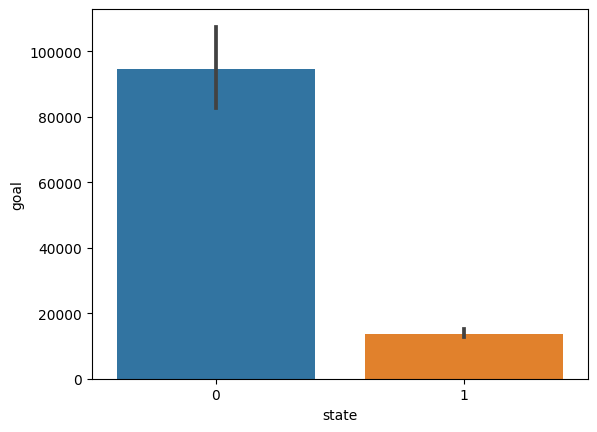

In [23]:
pd.set_option('display.max_columns', None)

#df_2.corr()

sns.barplot(data=df_2, x="state", y="goal")

<AxesSubplot:xlabel='state', ylabel='goal'>

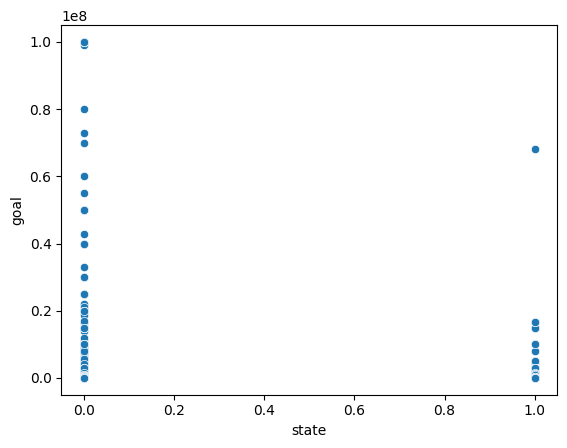

In [24]:
sns.scatterplot(data=df_2, x="state", y="goal")

In [25]:
df_2['state'].value_counts()

1    117465
0     75199
Name: state, dtype: int64

## Splitting the data

For our models we need to split our data frame into test and train data set. Out of this we can do our baseline and big model.
At first we have to define our target and our features for the models.

In [26]:
X = df_2.drop('state', axis= 1)
y = df_2['state']

print('Our features are:', list(X.columns))
print('Our target is: state')

Our features are: ['backers_count', 'converted_pledged_amount', 'created_at', 'deadline', 'goal', 'launched_at', 'state_changed_at', 'usd_pledged', 'country_AT', 'country_AU', 'country_BE', 'country_CA', 'country_CH', 'country_DE', 'country_DK', 'country_ES', 'country_FR', 'country_GB', 'country_HK', 'country_IE', 'country_IT', 'country_JP', 'country_LU', 'country_MX', 'country_NL', 'country_NO', 'country_NZ', 'country_SE', 'country_SG', 'country_US', 'currency_AUD', 'currency_CAD', 'currency_CHF', 'currency_DKK', 'currency_EUR', 'currency_GBP', 'currency_HKD', 'currency_JPY', 'currency_MXN', 'currency_NOK', 'currency_NZD', 'currency_SEK', 'currency_SGD', 'currency_USD', 'current_currency_CAD', 'current_currency_USD', 'staff_pick_False', 'staff_pick_True', 'usd_type_domestic', 'usd_type_international']
Our target is: state


In [27]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, stratify = y, random_state=RSEED)
'''We stratify the test split because we have an imbalance in the state column of the dataset'''

print('Rows and columns of X_train', X_train.shape)
print('Rows and columns of y_train', y_train.shape)
print('Rows and columns of X_test', X_test.shape)
print('Rows and columns of y_test', y_test.shape)

Rows and columns of X_train (129084, 50)
Rows and columns of y_train (129084,)
Rows and columns of X_test (63580, 50)
Rows and columns of y_test (63580,)


## Base model and Base model evaluation

Our hypothesis is: 

    If the goal is lower than 20000 the project is more likely to succeed

In [28]:
#to evaluate our baseline model we need a y_baseline. We decided that we have a successful project below 20000 so i will be 1.
# over 20000 i will be 0 for no success. So we can compare y_baseline with y_test to evaluate the model.
y_baseline = [1 if i <= 20000 else 0 for i in X_test['goal']]
y_baseline = np.array(y_baseline)
y_baseline

array([1, 1, 1, ..., 1, 0, 0])

In [29]:
print('---------------------------------------------')
print('Classification report')
print('---------------------------------------------')

#built classification report
clr = classification_report(y_test,y_baseline)

print(clr)
print('---------------------------------------------')
print('Confusion matrix')
print('---------------------------------------------')

# building confusion matrix
cfm = confusion_matrix(y_test,y_baseline)

print(cfm)


---------------------------------------------
Classification report
---------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.27      0.37     24816
           1       0.66      0.89      0.76     38764

    accuracy                           0.65     63580
   macro avg       0.64      0.58      0.57     63580
weighted avg       0.64      0.65      0.61     63580

---------------------------------------------
Confusion matrix
---------------------------------------------
[[ 6677 18139]
 [ 4139 34625]]


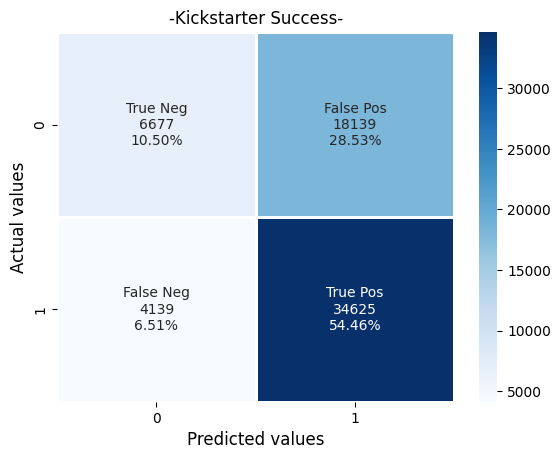

In [30]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cfm.flatten()/np.sum(cfm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cfm, annot=labels, fmt='', cmap='Blues',linewidths = 1)
plt.xlabel('Predicted values',fontsize=12)
plt.ylabel('Actual values',fontsize=12)
plt.title('-Kickstarter Success-',fontsize=12)
plt.show()

## Creating different Models

In this case we have a classification problem, where we want to predict whether a project/campaign on kickstarter will succeed or net.
To classify them we will go for following models:

1. Decision Tree
2. XGBoost
3. KNNeighbors 
4. Random Forest

We will try them all and compare them at the end, to show which model performs best.




In [38]:
#Import relevant classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from xgboost import XGBClassifier

## 1. Decision Tree

In [36]:
clf = DecisionTreeClassifier(random_state=RSEED)
clf.fit(X_train, y_train, sample_weight=None, check_input=True)

DecisionTreeClassifier(random_state=42)

In [42]:
#make prediction for classifier above

y_pred_dt = clf.predict(X_test)
y_pred_dt

array([0, 1, 1, ..., 0, 0, 1])

## XGboost Classifier

In [53]:
boost = XGBClassifier(random_state=RSEED)
model_boost= boost.fit(X_train,y_train)

In [43]:
#make prediction for classifier above

y_pred_boost = boost.predict(X_test)
y_pred_boost

array([0, 1, 1, ..., 0, 0, 1])

## KNeighbors

In [37]:
neigh = KNeighborsClassifier(n_neighbors=3,random_state=RSEED)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [44]:
#make prediction for classifier above

y_pred_neigh = neigh.predict(X_test)
y_pred_neigh

array([1, 0, 1, ..., 0, 1, 1])

## Random Forest Classifier

In [39]:
forest = RandomForestClassifier(random_state=RSEED)
forest.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [45]:
#make prediction for classifier above

y_pred_forest = forest.predict(X_test)
y_pred_forest

array([0, 1, 1, ..., 0, 0, 1])

## First evaluation of the models

blabla

---------------------------------------------
Classification report
---------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     24816
           1       1.00      1.00      1.00     38764

    accuracy                           1.00     63580
   macro avg       1.00      1.00      1.00     63580
weighted avg       1.00      1.00      1.00     63580

---------------------------------------------
Confusion matrix
---------------------------------------------
[[24635   181]
 [  101 38663]]


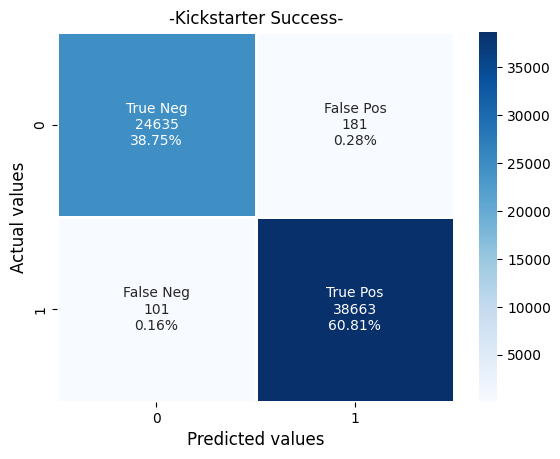

In [47]:
#Evaluation of the Decision tree classifier
print('---------------------------------------------')
print('Classification report')
print('---------------------------------------------')

#built classification report
clr = classification_report(y_test,y_pred_dt)

print(clr)
print('---------------------------------------------')
print('Confusion matrix')
print('---------------------------------------------')

# building confusion matrix
cfm = confusion_matrix(y_test,y_pred_dt)

print(cfm)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cfm.flatten()/np.sum(cfm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cfm, annot=labels, fmt='', cmap='Blues',linewidths = 1)
plt.xlabel('Predicted values',fontsize=12)
plt.ylabel('Actual values',fontsize=12)
plt.title('-Kickstarter Success-',fontsize=12)
plt.show()

---------------------------------------------
Classification report
---------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     24816
           1       1.00      1.00      1.00     38764

    accuracy                           1.00     63580
   macro avg       1.00      1.00      1.00     63580
weighted avg       1.00      1.00      1.00     63580

---------------------------------------------
Confusion matrix
---------------------------------------------
[[24664   152]
 [    9 38755]]


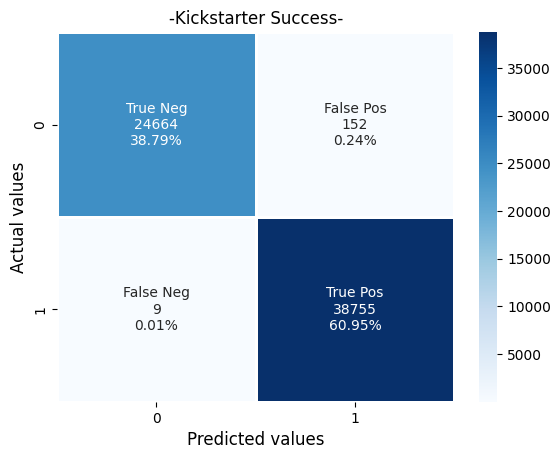

In [48]:
#Evaluation of the XGboost classifier
print('---------------------------------------------')
print('Classification report')
print('---------------------------------------------')

#built classification report
clr = classification_report(y_test,y_pred_boost)

print(clr)
print('---------------------------------------------')
print('Confusion matrix')
print('---------------------------------------------')

# building confusion matrix
cfm = confusion_matrix(y_test,y_pred_boost)

print(cfm)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cfm.flatten()/np.sum(cfm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cfm, annot=labels, fmt='', cmap='Blues',linewidths = 1)
plt.xlabel('Predicted values',fontsize=12)
plt.ylabel('Actual values',fontsize=12)
plt.title('-Kickstarter Success-',fontsize=12)
plt.show()

---------------------------------------------
Classification report
---------------------------------------------
              precision    recall  f1-score   support

           0       0.55      0.49      0.52     24816
           1       0.70      0.74      0.72     38764

    accuracy                           0.65     63580
   macro avg       0.63      0.62      0.62     63580
weighted avg       0.64      0.65      0.64     63580

---------------------------------------------
Confusion matrix
---------------------------------------------
[[12259 12557]
 [ 9901 28863]]


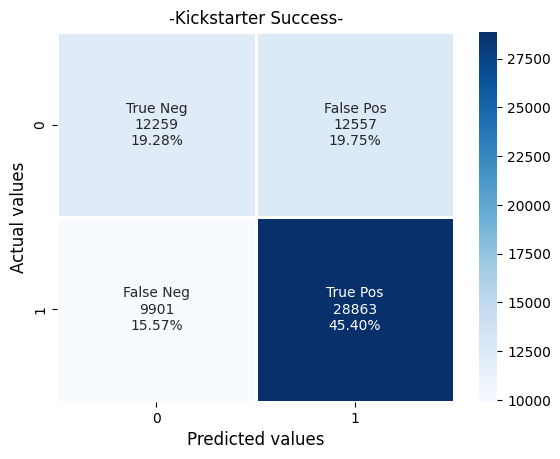

In [49]:
#Evaluation of the KNeighbors classifier
print('---------------------------------------------')
print('Classification report')
print('---------------------------------------------')

#built classification report
clr = classification_report(y_test,y_pred_neigh)

print(clr)
print('---------------------------------------------')
print('Confusion matrix')
print('---------------------------------------------')

# building confusion matrix
cfm = confusion_matrix(y_test,y_pred_neigh)

print(cfm)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cfm.flatten()/np.sum(cfm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cfm, annot=labels, fmt='', cmap='Blues',linewidths = 1)
plt.xlabel('Predicted values',fontsize=12)
plt.ylabel('Actual values',fontsize=12)
plt.title('-Kickstarter Success-',fontsize=12)
plt.show()

---------------------------------------------
Classification report
---------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     24816
           1       0.99      1.00      0.99     38764

    accuracy                           0.99     63580
   macro avg       0.99      0.99      0.99     63580
weighted avg       0.99      0.99      0.99     63580

---------------------------------------------
Confusion matrix
---------------------------------------------
[[24309   507]
 [   74 38690]]


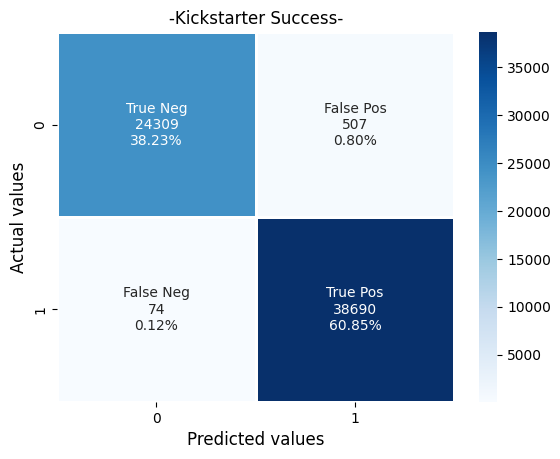

In [50]:
#Evaluation of the RandomForest classifier
print('---------------------------------------------')
print('Classification report')
print('---------------------------------------------')

#built classification report
clr = classification_report(y_test,y_pred_forest)

print(clr)
print('---------------------------------------------')
print('Confusion matrix')
print('---------------------------------------------')

# building confusion matrix
cfm = confusion_matrix(y_test,y_pred_forest)

print(cfm)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cfm.flatten()/np.sum(cfm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cfm, annot=labels, fmt='', cmap='Blues',linewidths = 1)
plt.xlabel('Predicted values',fontsize=12)
plt.ylabel('Actual values',fontsize=12)
plt.title('-Kickstarter Success-',fontsize=12)
plt.show()

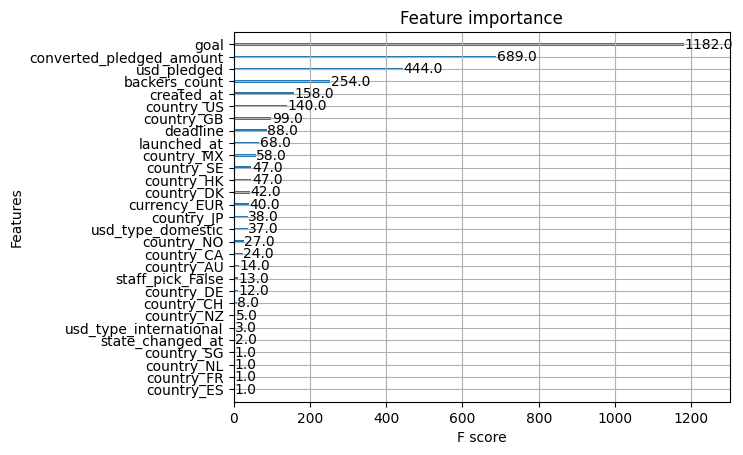

In [54]:
#show the importance of features for xgboost classifier
plot_importance(model_boost)
pyplot.show()